In [26]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("SurfaceTemp.csv")
df.head(5)



,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [27]:
missing_values = df.isna().sum()
print(missing_values)

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64


In [28]:
data_cleaned = df.dropna()
print(data_cleaned)

                 dt  AverageTemperature  AverageTemperatureUncertainty  \
0        1743-11-01               6.068                          1.737   
5        1744-04-01               5.788                          3.624   
6        1744-05-01              10.644                          1.283   
7        1744-06-01              14.051                          1.347   
8        1744-07-01              16.082                          1.396   
...             ...                 ...                            ...   
8599206  2013-04-01               7.710                          0.182   
8599207  2013-05-01              11.464                          0.236   
8599208  2013-06-01              15.043                          0.261   
8599209  2013-07-01              18.775                          0.193   
8599210  2013-08-01              18.025                          0.298   

           City      Country Latitude Longitude  
0         Århus      Denmark   57.05N    10.33E  
5         Å

In [31]:
data_cleaned.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

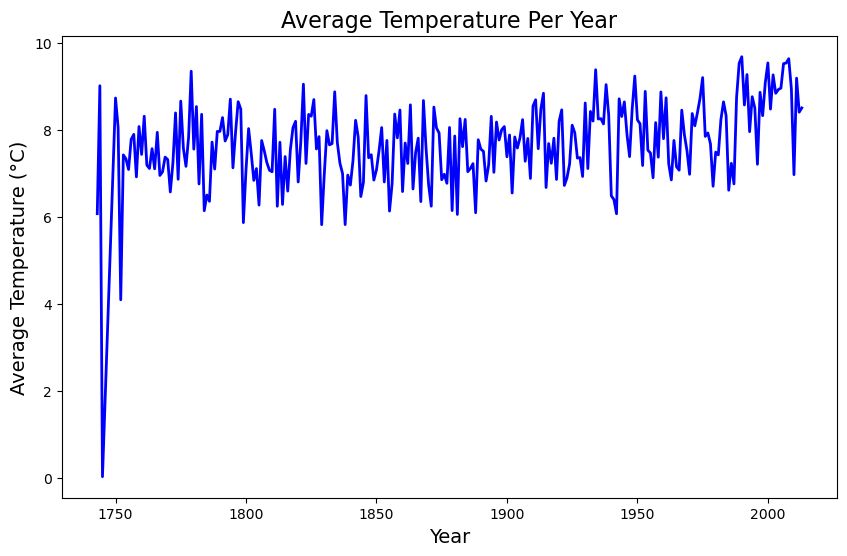

In [20]:
df['dt'] = pd.to_datetime(df['dt'])
df_cleaned = df.dropna(subset=['AverageTemperature']).copy()  
df_cleaned['Year'] = df_cleaned['dt'].dt.year
city = 'Århus'
city_data = df_cleaned[df_cleaned['City'] == city]
avg_temp_city = city_data.groupby('Year')['AverageTemperature'].mean()
plt.figure(figsize=(10, 6))
avg_temp_city.plot(kind='line', color='blue', linewidth=2)
plt.title('Average Temperature Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temperature (°C)', fontsize=14)
plt.show()


In [21]:
df.columns


Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

C:\Users\cvr\AppData\Local\Temp\ipykernel_14220\4159462489.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_cities['AverageTemperature'] = pd.to_numeric(df_selected_cities['AverageTemperature'], errors='coerce')


<Figure size 1200x800 with 0 Axes>

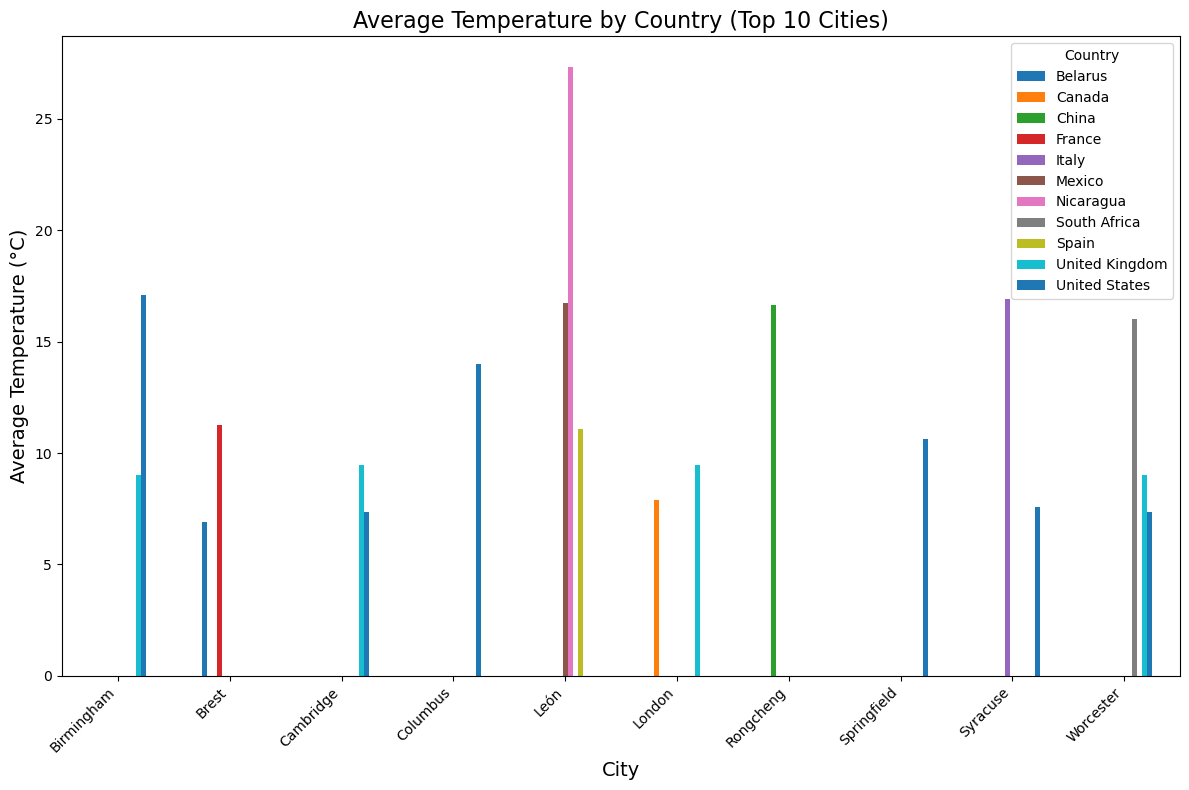

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
top_cities = df['City'].value_counts().head(10).index.tolist()
df_selected_cities = df[df['City'].isin(top_cities)]
df_selected_cities['AverageTemperature'] = pd.to_numeric(df_selected_cities['AverageTemperature'], errors='coerce')
avg_temp_by_country_city = df_selected_cities.groupby(['Country', 'City'])['AverageTemperature'].mean().reset_index()
avg_temp_pivot = avg_temp_by_country_city.pivot(index='City', columns='Country', values='AverageTemperature')
avg_temp_pivot.fillna(0, inplace=True)
plt.figure(figsize=(12, 8))
avg_temp_pivot.plot(kind='bar', figsize=(12, 8))
plt.title('Average Temperature by Country (Top 10 Cities)', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Temperature (°C)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country')
plt.tight_layout()


plt.show()


The country with the highest average temperature is Nicaragua with an average temperature of 27.34302164066432°C.


C:\Users\cvr\AppData\Local\Temp\ipykernel_14220\1286656341.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_cities['AverageTemperature'] = pd.to_numeric(df_selected_cities['AverageTemperature'], errors='coerce')


<Figure size 1200x800 with 0 Axes>

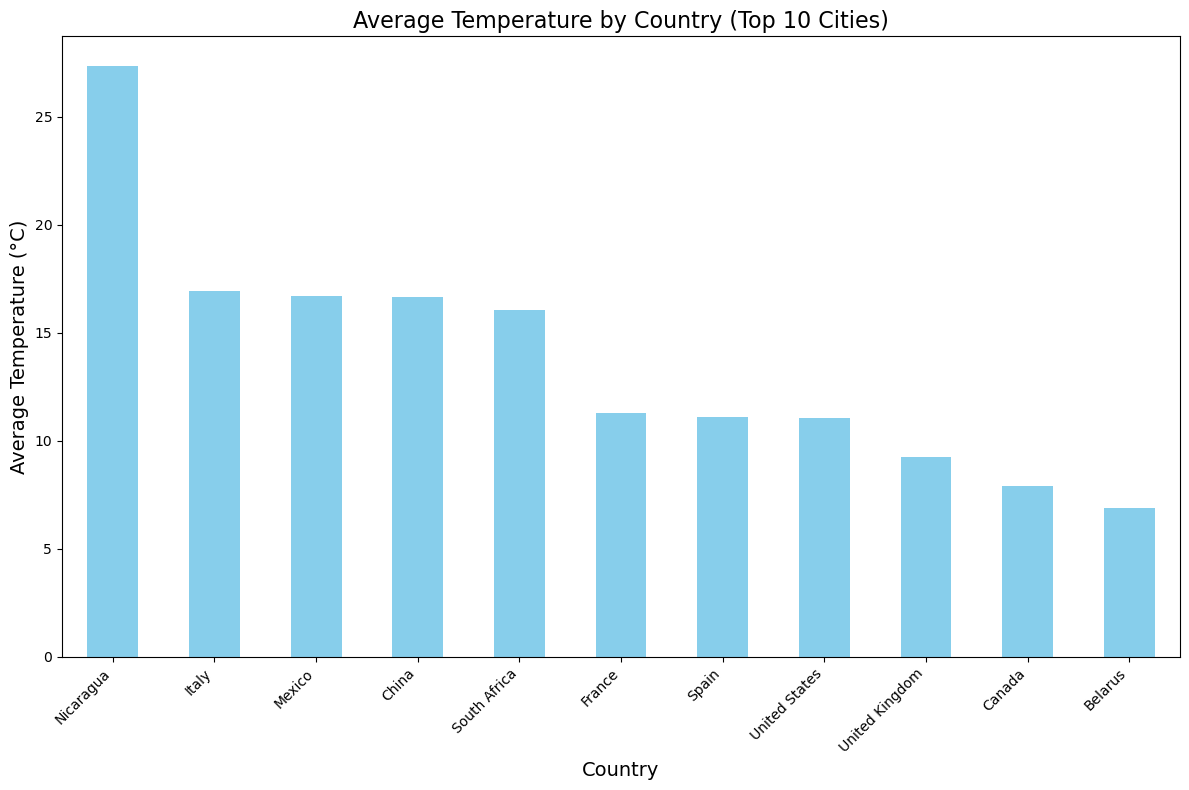

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
top_cities = df['City'].value_counts().head(10).index.tolist()
df_selected_cities = df[df['City'].isin(top_cities)]
df_selected_cities['AverageTemperature'] = pd.to_numeric(df_selected_cities['AverageTemperature'], errors='coerce')
avg_temp_by_country = df_selected_cities.groupby('Country')['AverageTemperature'].mean().reset_index()
avg_temp_by_country_sorted = avg_temp_by_country.sort_values(by='AverageTemperature', ascending=False)
highest_temp_country = avg_temp_by_country_sorted.iloc[0]
print(f"The country with the highest average temperature is {highest_temp_country['Country']} with an average temperature of {highest_temp_country['AverageTemperature']}°C.")
plt.figure(figsize=(12, 8))
avg_temp_by_country_sorted.plot(kind='bar', x='Country', y='AverageTemperature', figsize=(12, 8), legend=False, color='skyblue')
plt.title('Average Temperature by Country (Top 10 Cities)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average Temperature (°C)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [37]:
unique=df['Country'].unique()
print(unique)

['Denmark' 'Turkey' 'Kazakhstan' 'China' 'Spain' 'Germany' 'Nigeria'
 'Iran' 'Russia' 'Canada' "Côte D'Ivoire" 'United Kingdom' 'Saudi Arabia'
 'Japan' 'United States' 'India' 'Benin' 'United Arab Emirates' 'Mexico'
 'Venezuela' 'Ghana' 'Ethiopia' 'Australia' 'Yemen' 'Indonesia' 'Morocco'
 'Pakistan' 'France' 'Libya' 'Burma' 'Brazil' 'South Africa' 'Syria'
 'Egypt' 'Algeria' 'Netherlands' 'Malaysia' 'Portugal' 'Ecuador' 'Italy'
 'Uzbekistan' 'Philippines' 'Madagascar' 'Chile' 'Belgium' 'El Salvador'
 'Romania' 'Peru' 'Colombia' 'Tanzania' 'Tunisia' 'Turkmenistan' 'Israel'
 'Eritrea' 'Paraguay' 'Greece' 'New Zealand' 'Vietnam' 'Cameroon' 'Iraq'
 'Afghanistan' 'Argentina' 'Azerbaijan' 'Moldova' 'Mali'
 'Congo (Democratic Republic Of The)' 'Thailand'
 'Central African Republic' 'Bosnia And Herzegovina' 'Bangladesh'
 'Switzerland' 'Equatorial Guinea' 'Cuba' 'Lebanon' 'Mozambique' 'Serbia'
 'Angola' 'Somalia' 'Norway' 'Nepal' 'Poland' 'Ukraine' 'Guinea Bissau'
 'Malawi' 'Burkina Faso' 'Slov

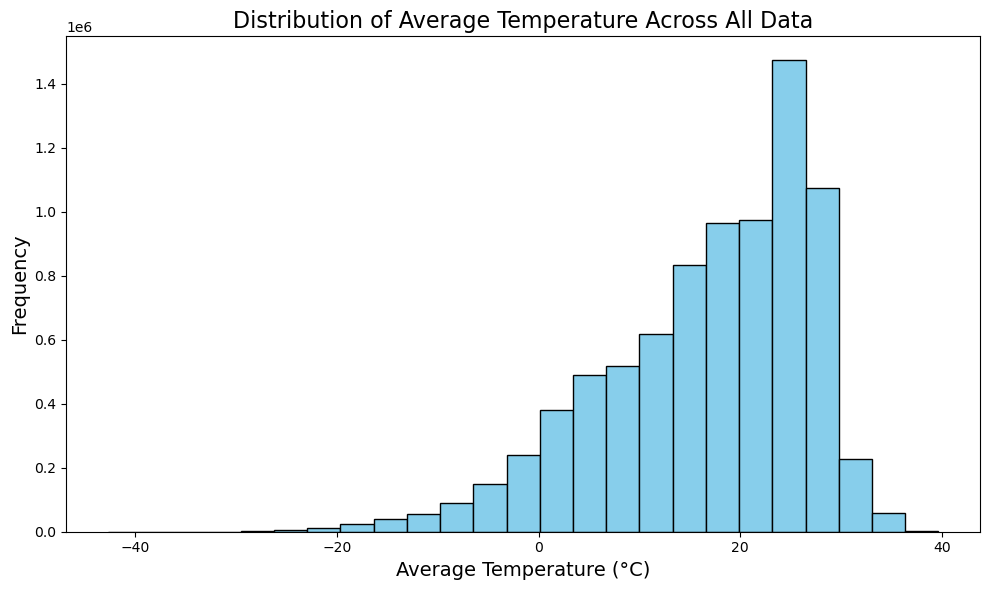

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
df['AverageTemperature'] = pd.to_numeric(df['AverageTemperature'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.hist(df['AverageTemperature'].dropna(), bins=25, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Temperature Across All Data', fontsize=16)
plt.xlabel('Average Temperature (°C)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()


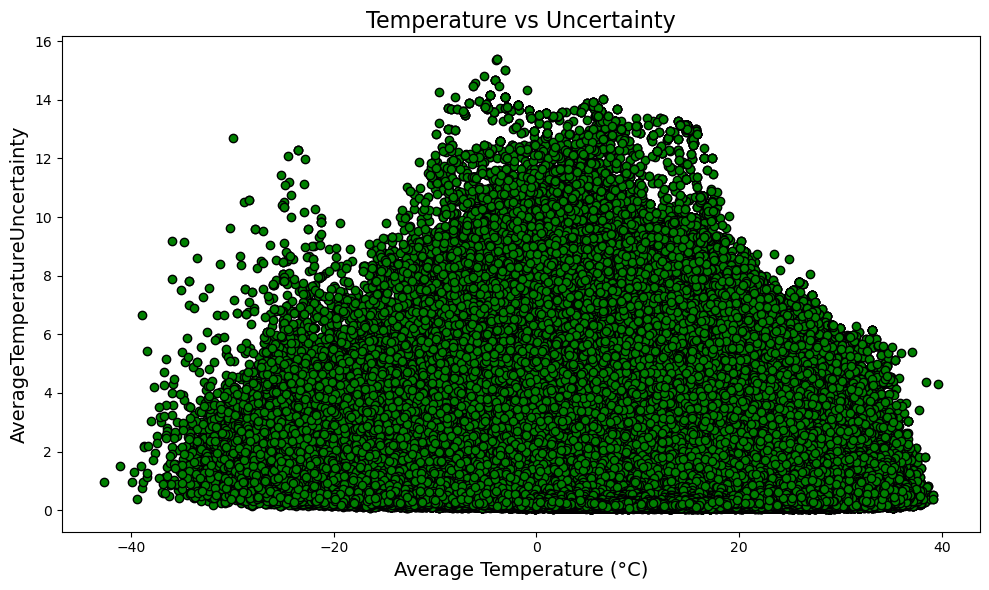

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
df['AverageTemperature'] = pd.to_numeric(df['AverageTemperature'], errors='coerce')
df['AverageTemperatureUncertainty'] = pd.to_numeric(df['AverageTemperatureUncertainty'], errors='coerce')
df_clean = df.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['AverageTemperature'], df_clean['AverageTemperatureUncertainty'], color='green', edgecolor='black')
plt.title('Temperature vs Uncertainty', fontsize=16)
plt.xlabel('Average Temperature (°C)', fontsize=14)
plt.ylabel('AverageTemperatureUncertainty', fontsize=14)
plt.tight_layout()
plt.show()



Summary for countries between 2010-01-01 and 2020-01-01:
Q1 (25th percentile): 12.192172280844156
Median (50th percentile): 21.189576923076924
Q3 (75th percentile): 26.397007386363637
Interquartile Range (IQR): 14.20483510551948
Lower Bound for Outliers: -9.115080377435065
Upper Bound for Outliers: 47.70426004464286
Outliers: []


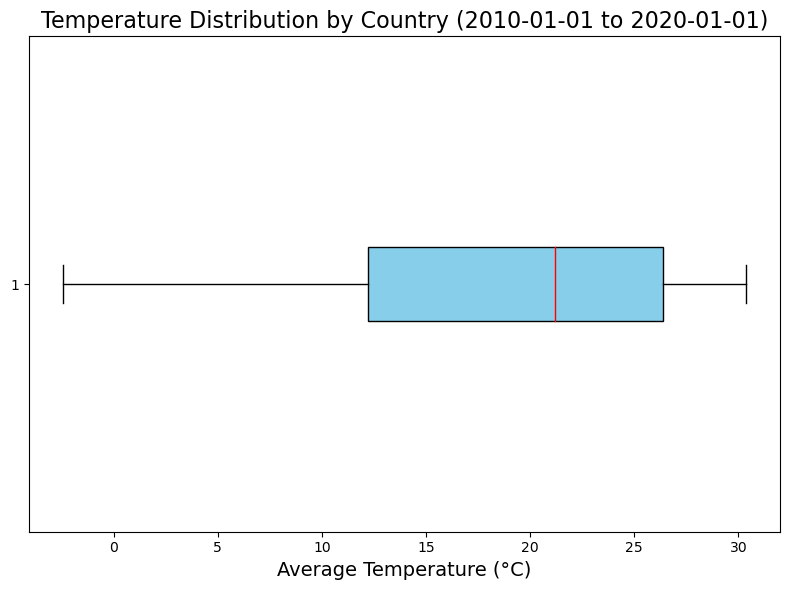

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
df['dt'] = pd.to_datetime(df['dt'])
start_date = '2010-01-01'
end_date = '2020-01-01'
df_filtered = df[(df['dt'] >= start_date) & (df['dt'] <= end_date)]
avg_temp_by_country = df_filtered.groupby('Country')['AverageTemperature'].mean()
top_countries = avg_temp_by_country.head(10)
Q1 = avg_temp_by_country.quantile(0.25)
Q2 = avg_temp_by_country.median()
Q3 = avg_temp_by_country.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = avg_temp_by_country[(avg_temp_by_country < lower_bound) | (avg_temp_by_country > upper_bound)]
print(f"Summary for countries between {start_date} and {end_date}:")
print(f"Q1 (25th percentile): {Q1}")
print(f"Median (50th percentile): {Q2}")
print(f"Q3 (75th percentile): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")
print(f"Outliers: {outliers.index.values}")
plt.figure(figsize=(8, 6))
plt.boxplot(avg_temp_by_country, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'), 
            medianprops=dict(color='red'), whiskerprops=dict(color='black'), capprops=dict(color='black'))
plt.title(f'Temperature Distribution by Country ({start_date} to {end_date})', fontsize=16)
plt.xlabel('Average Temperature (°C)', fontsize=14)
plt.tight_layout()
plt.show()


In [51]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [54]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
tips=sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


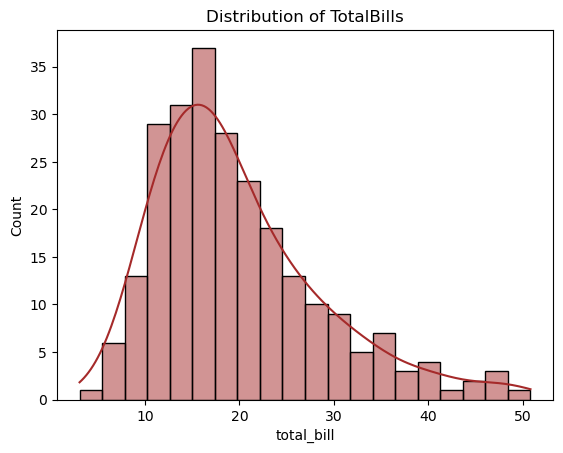

In [56]:
sns.histplot(data=tips,x="total_bill",kde=True,bins=20,color="brown")
plt.title("Distribution of TotalBills")
plt.show()

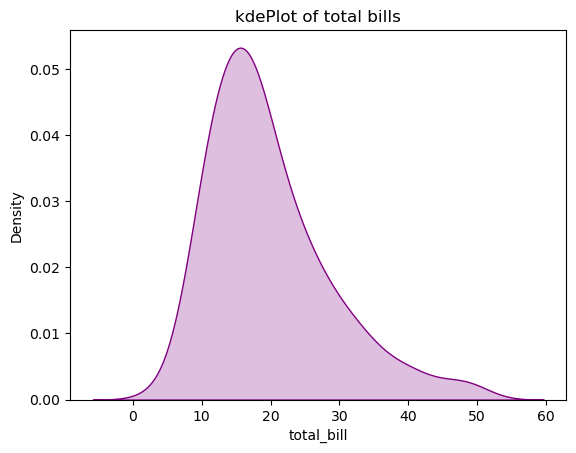

In [58]:
sns.kdeplot(data=tips,x="total_bill",fill=True,color="purple")
plt.title("kdePlot of total bills")
plt.show()

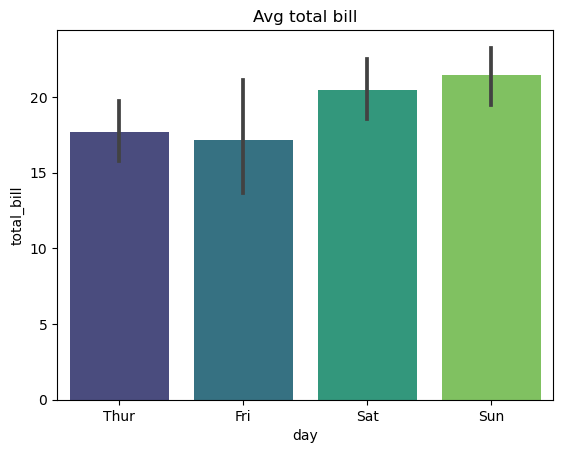

In [60]:
sns.barplot(data=tips,x="day",y="total_bill",palette="viridis")
plt.title("Avg total bill")
plt.show()

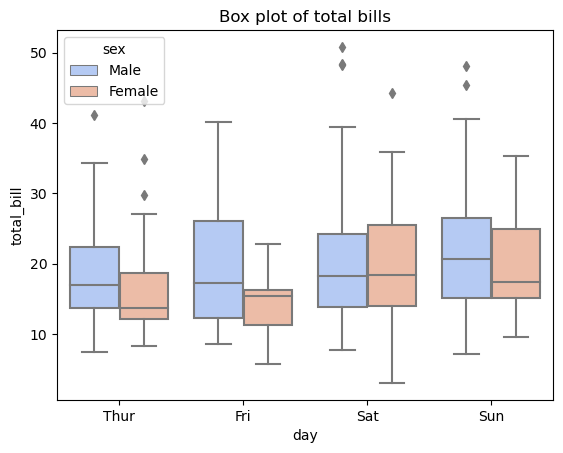

In [61]:
sns.boxplot(data=tips,x="day",y="total_bill",hue="sex",palette="coolwarm")
plt.title("Box plot of total bills")
plt.show()

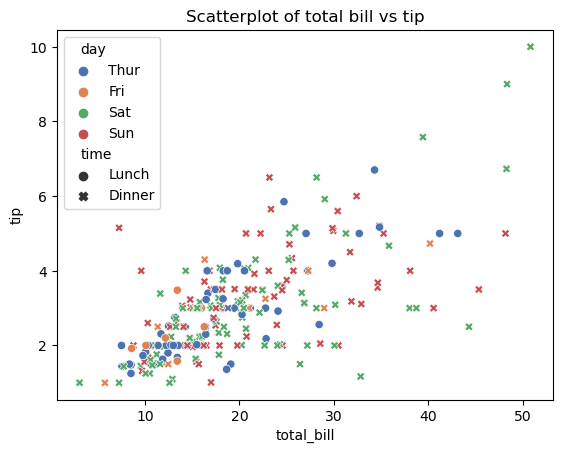

In [62]:
sns.scatterplot(data=tips,x="total_bill",y="tip",hue="day",style="time",palette="deep")
plt.title("Scatterplot of total bill vs tip")
plt.show()


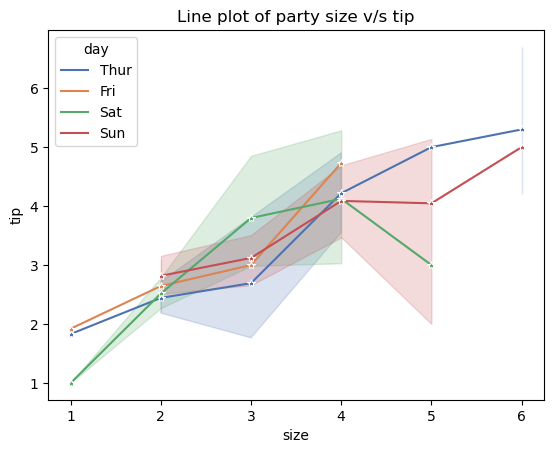

In [63]:
sns.lineplot(data=tips,x="size",y="tip",hue="day",marker='*',palette="deep")
plt.title("Line plot of party size v/s tip")
plt.show()

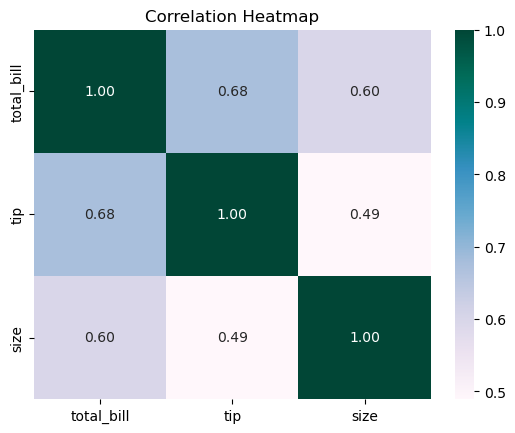

In [70]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
numeric_cols = tips.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='PuBuGn', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


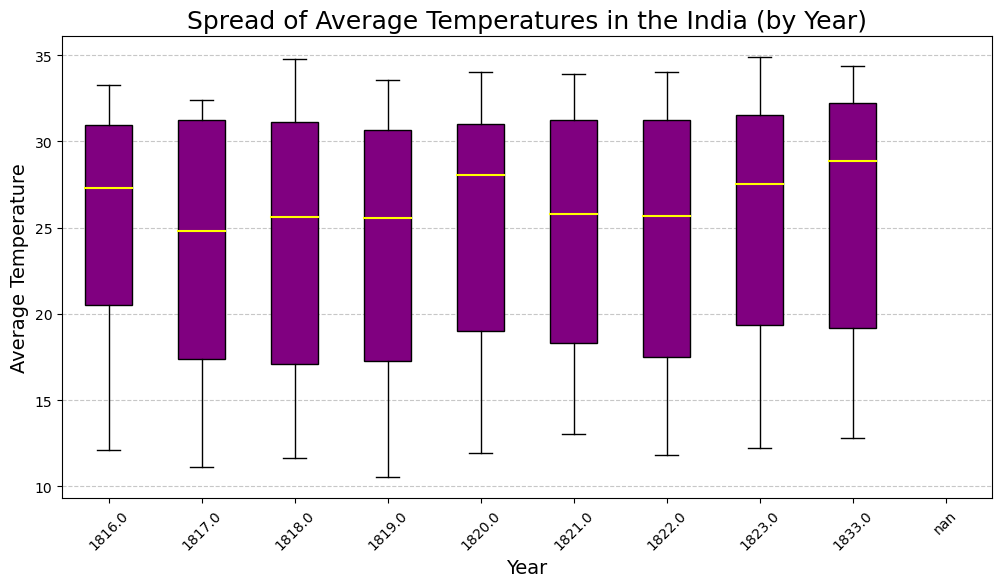

In [69]:
import matplotlib.pyplot as plt
country_data = df[df['Country'] == 'India'].dropna()
country_data['Year'] = pd.to_datetime(country_data['dt']).dt.year.head(100)
temperature_data = country_data[['Year', 'AverageTemperature']]
plt.figure(figsize=(12, 6))
plt.boxplot(
    [temperature_data[temperature_data['Year'] == year]['AverageTemperature'] for year in temperature_data['Year'].unique()],
    labels=temperature_data['Year'].unique(),
    patch_artist=True,
    boxprops=dict(facecolor='purple', color='black'),
    medianprops=dict(color='yellow', linewidth=1.5),
    flierprops=dict(marker='o', color='red', alpha=0.5),
)
plt.title('Spread of Average Temperatures in the India (by Year)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temperature', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


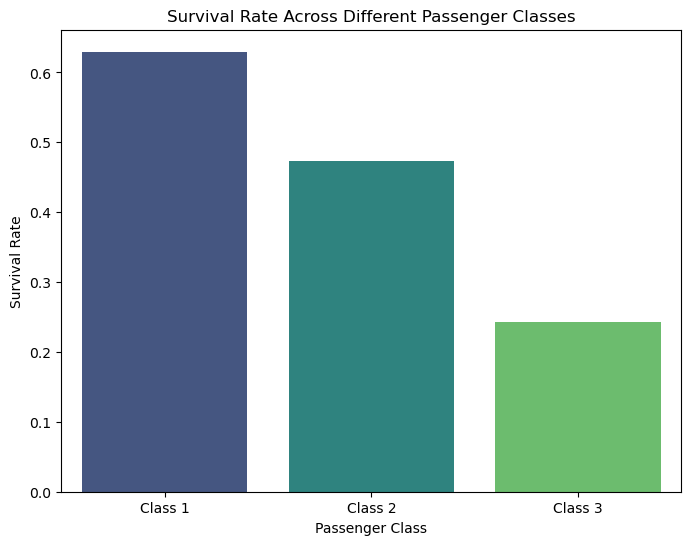

In [23]:
survival_rate = df.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(data=df,x=survival_rate.index, y=survival_rate.values, palette='viridis')
plt.title('Survival Rate Across Different Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1, 2], labels=['Class 1', 'Class 2', 'Class 3'])
plt.show()


C:\Users\cvr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


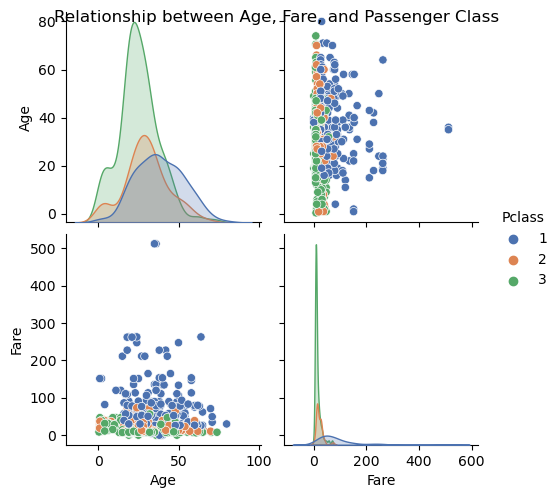

In [24]:
d = df[['Age', 'Fare', 'Pclass']] 
sns.pairplot(data=d, hue='Pclass', palette='deep')
plt.suptitle("Relationship between Age, Fare, and Passenger Class")  
plt.show()


C:\Users\cvr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


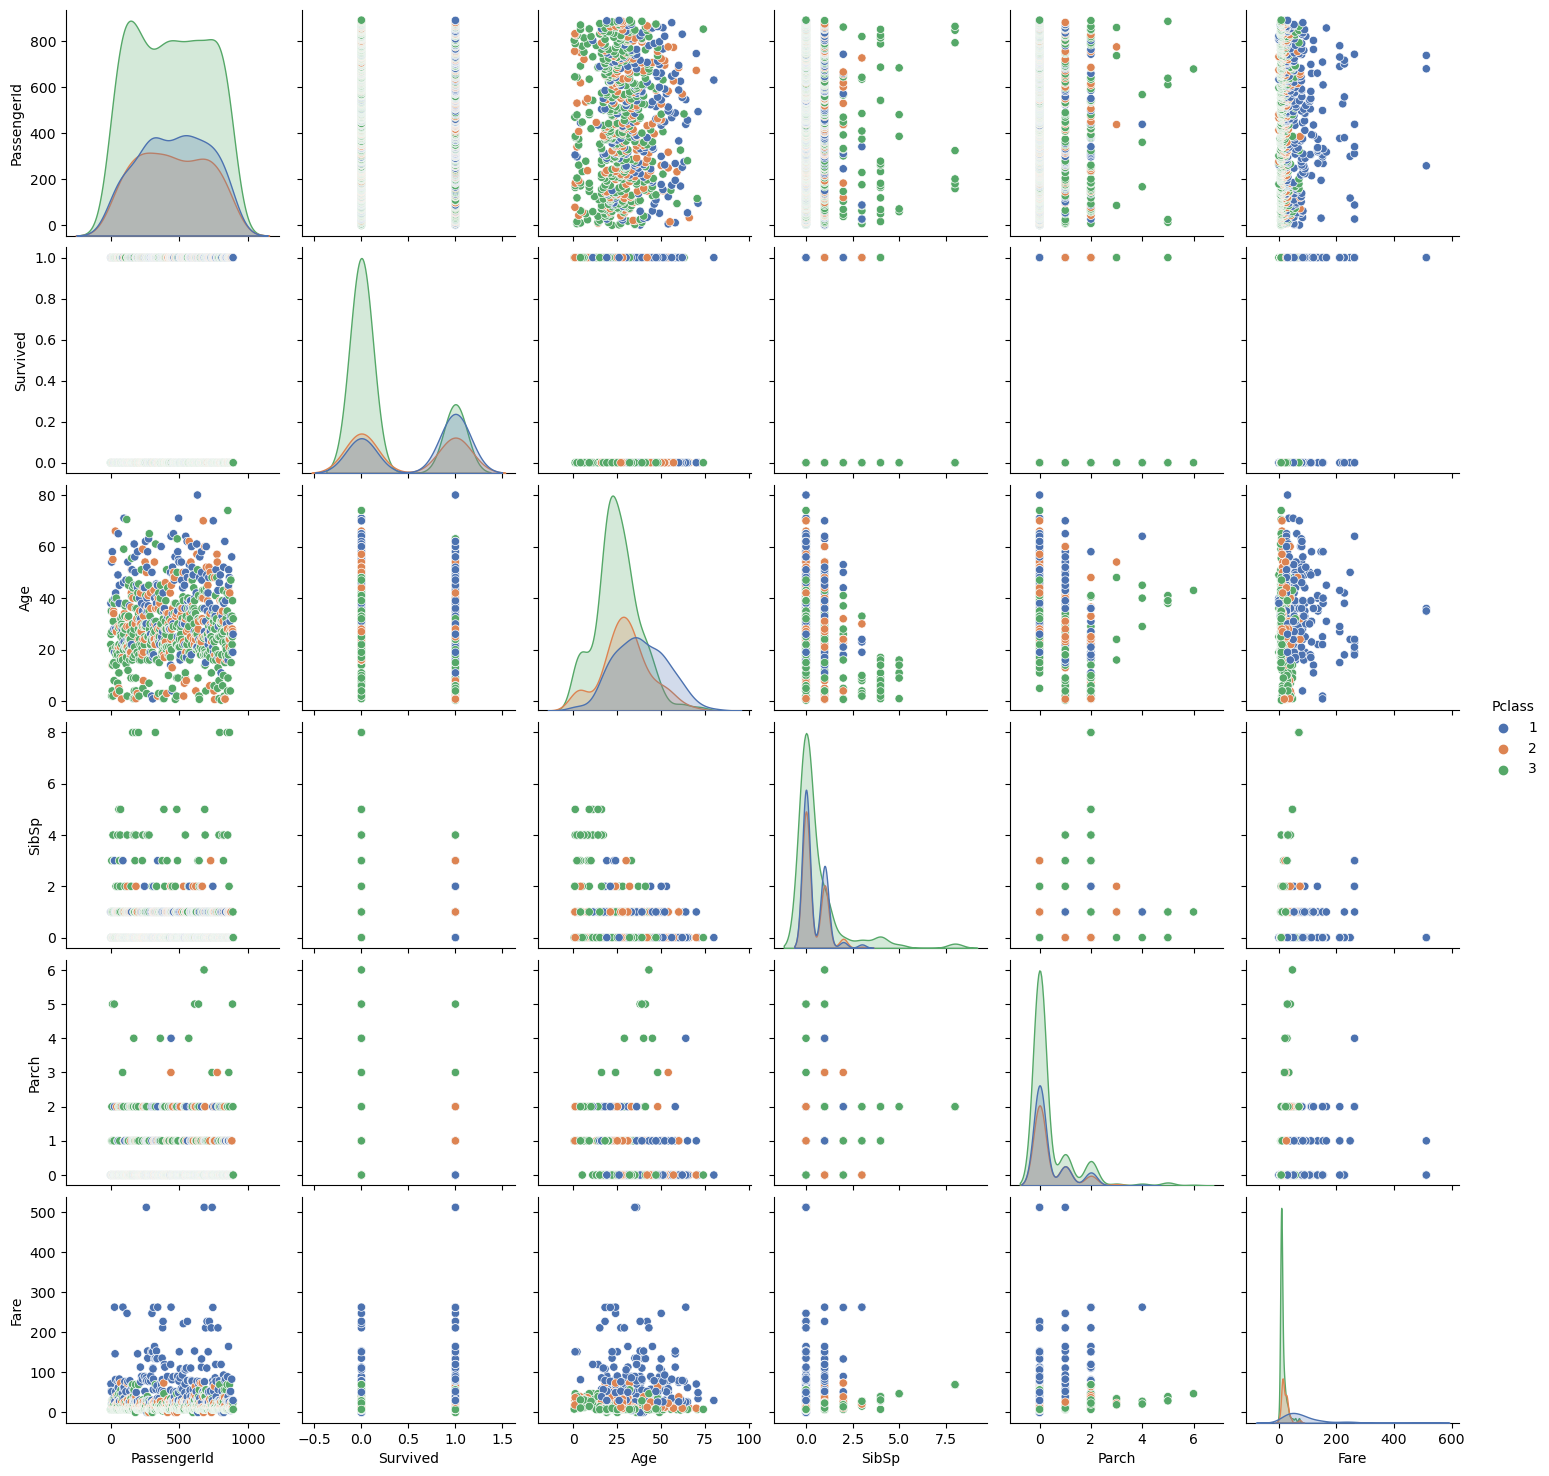

In [25]:
sns.pairplot(data=df,hue='Pclass',palette='deep')
plt.show()

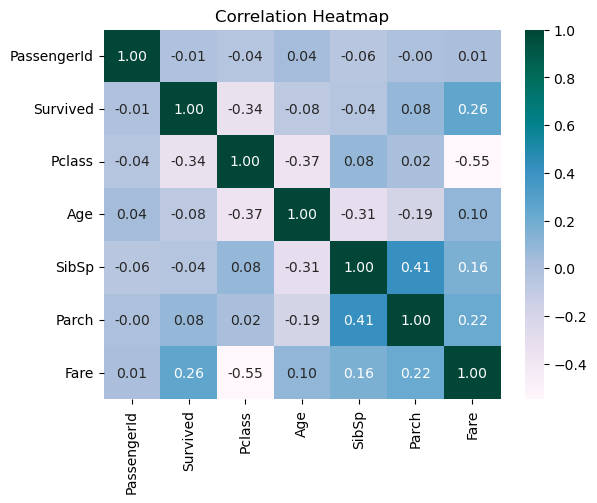

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
numeric_cols = df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='PuBuGn', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()